<a href="https://colab.research.google.com/github/Aaron-David-HdM/Applied-Data-Analytics/blob/main/Durchf%C3%BChrung%20der%20Clusternanalyse%20mit%20unterdurchschnittlichen%20Bewertungen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Aaron-David-HdM/Applied-Data-Analytics.git

Cloning into 'Applied-Data-Analytics'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 350 (delta 70), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (350/350), 468.31 KiB | 5.85 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
%cd /content/Applied-Data-Analytics/UseCase_2

/content/Applied-Data-Analytics/UseCase_2


**Importieren der benötigten Bibliotheken sowie Laden der Daten**

In [146]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

filepath = 'Verkaufszahlen.csv' # Bereinigte Verkaufszahlen für Usecase 2
df = pd.read_csv(filepath, decimal='.')

**Berechnen des Bewertungsdurchschnitts**

In [147]:
average_of_ratings = round(df["Rating"].mean(), 1)
print(average_of_ratings)

7.0


**Datensatz von den Ratings-Werten kleiner als dem Ratingsdurchschnitt bereinigen**

In [148]:
df = df.loc[(df['Rating'] < average_of_ratings)]
df = df.drop('Unnamed: 0', 1)

df.rename(columns={'Total': 'Total_expenses'}, inplace=True)

df

,Gender,Total_expenses,Rating
4,Male,634.38,5.3
5,Male,627.62,4.1
6,Female,433.69,5.8
9,Female,172.75,5.9
10,Female,60.82,4.5
...,...,...,...
994,Female,64.00,5.9
995,Male,42.37,6.2
996,Female,1022.49,4.4
998,Male,69.11,4.1


**Pairplot zu unserem Datensatz**

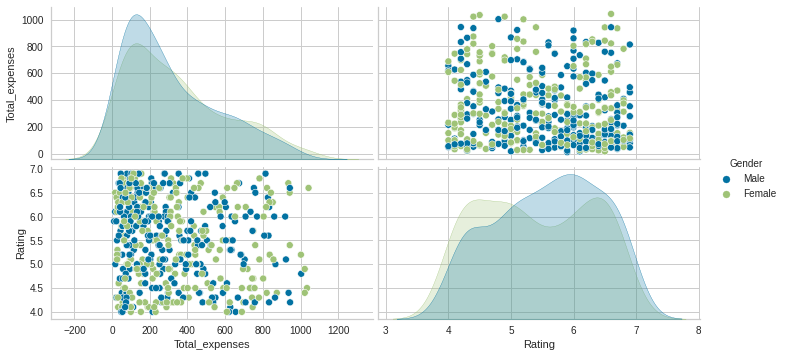

In [149]:
sns.pairplot(df, hue='Gender', aspect=2)

**Scatterplot zu den Gesamtausgaben der Kunden und deren Bewertung**

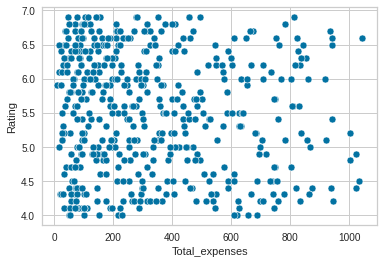

In [150]:
sns.scatterplot(x='Total_expenses', y='Rating', data=df);

**Standardisierung der Features, damit die Werte der Variablen in einem einheitlichen Werteintervall vorliegen**

In [151]:
X = df[['Total_expenses','Rating']] 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

**Scatterplot mit standardisierten Axen**

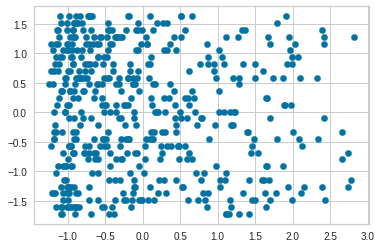

In [183]:
plt.scatter(X_std[:, 0], X_std[:, 1], s=40);

**Elbow Point Graph um den optimalen Wert von K zu ermitteln**

K = Anzahl der Cluster, die durch den k-Means-Algorithmus gebildet werden

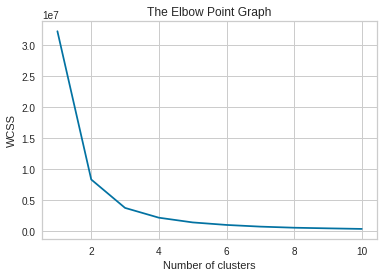

In [152]:
wcss = [] # within-cluster sum of squares
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  

#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Silhouetten Analyse um den optimalen Wert von K nochmals zu überprüfen**



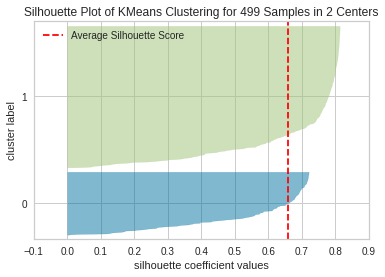

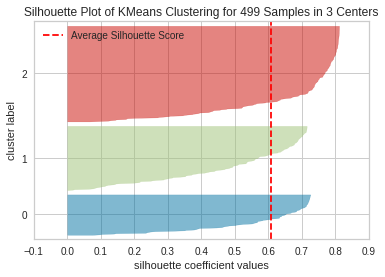

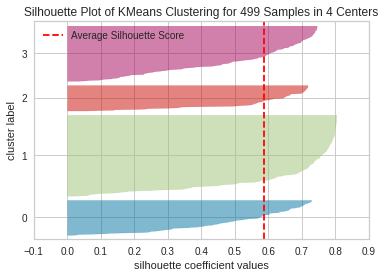

In [189]:
X_silhouette = df[['Total_expenses','Rating']]

silhouette_score_2_cluster = 0
silhouette_score_3_cluster = 0
silhouette_score_4_clusters = 0

for i in range(2,5):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X_silhouette)

  if(i == 2):
    silhouette_score_2_clusters = visualizer.silhouette_score_
  elif(i == 3):
    silhouette_score_3_clusters = visualizer.silhouette_score_
  else:
    silhouette_score_4_clusters = visualizer.silhouette_score_

  visualizer.show()

**Average Silhouetten Scores**

In [190]:
print("Silhouetten Score für 2 Cluster: ",silhouette_score_2_clusters)
print("Silhouetten Score für 3 Cluster: ",silhouette_score_3_clusters)
print("Silhouetten Score für 4 Cluster: ",silhouette_score_4_clusters)

Silhouetten Score für 2 Cluster:  0.6577209157060238
Silhouetten Score für 3 Cluster:  0.6094197110531265
Silhouetten Score für 4 Cluster:  0.5883677692256567


**Durchführung des k-Means-Algorithmus**

In [159]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

KMeans(n_clusters=3)

In [160]:
y_kmeans = kmeans.predict(X_std)

**Scatterplot nach Durchführung des k-Means-Algorithmus**

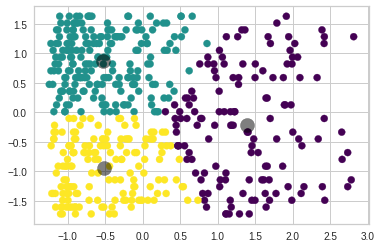

In [161]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [165]:
df['gender_kmeans'] = y_kmeans

**Durchführung des Hierarchical Clusterings (Ward-Algorithmus)**

In [166]:
ward = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=3)
ward.fit(X_std)

AgglomerativeClustering(n_clusters=3)

**Scatterplot nach Durchführung des Ward-Algorithmus**

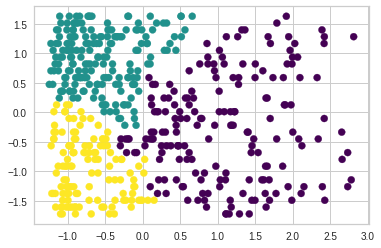

In [167]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=ward.labels_, s=50, cmap='viridis'); 

In [168]:
gender_ward = ward.fit_predict(X_std)

In [169]:
df['gender_ward'] = gender_ward 

**Vergleichen der Ergebnisse der beiden Algorithmen**

In [171]:
df['Gender'].value_counts()

Male      257
Female    242
Name: Gender, dtype: int64

**k-Means-Algorithmus**

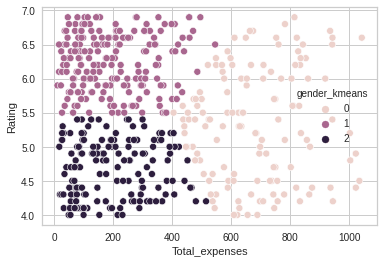

In [172]:
sns.scatterplot(x='Total_expenses', y='Rating', hue='gender_kmeans', data=df);

In [173]:
df['gender_kmeans'].value_counts()

1    205
2    158
0    136
Name: gender_kmeans, dtype: int64

**k-Means-Cluster mit schlechteren Bewertungen und niedrigeren Ausgaben (2)**

In [176]:
df_kmeans_cluster_2 = df[df.gender_kmeans == 2]
kmeans_gender_occurencies_cluster_2_female = df_kmeans_cluster_2['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_2_male = df_kmeans_cluster_2['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_2 = kmeans_gender_occurencies_cluster_2_female + kmeans_gender_occurencies_cluster_2_male
female_proportion_kmeans_cluster_2 = round((kmeans_gender_occurencies_cluster_2_female /  kmeans_gender_sum_cluster_2) * 100, 2)
male_proportion_kmeans_cluster_2 = 100 - female_proportion_kmeans_cluster_2

print("Cluster 2:\n", "Female: ",kmeans_gender_occurencies_cluster_2_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_2_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_2, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_2, "%")


Cluster 2:
 Female:  85 
 Male:  73 
 Anteil der Frauen:  53.8 % 
 Anteil der Männer:  46.2 %


**k-Means-Cluster mit besseren Bewertungen und niedrigeren Ausgaben (1)**

In [177]:
df_kmeans_cluster_1 = df[df.gender_kmeans == 1]
kmeans_gender_occurencies_cluster_1_female = df_kmeans_cluster_1['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_1_male = df_kmeans_cluster_1['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_1 = kmeans_gender_occurencies_cluster_1_female + kmeans_gender_occurencies_cluster_1_male
female_proportion_kmeans_cluster_1 = round((kmeans_gender_occurencies_cluster_1_female /  kmeans_gender_sum_cluster_1) * 100, 2)
male_proportion_kmeans_cluster_1 = 100 - female_proportion_kmeans_cluster_1

print("Cluster 1:\n", "Female: ",kmeans_gender_occurencies_cluster_1_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_1_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_1, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_1, "%")

Cluster 1:
 Female:  86 
 Male:  119 
 Anteil der Frauen:  41.95 % 
 Anteil der Männer:  58.05 %


**k-Means-Cluster mit höheren Ausgaben (0)**

In [178]:
df_kmeans_cluster_0 = df[df.gender_kmeans == 0]
kmeans_gender_occurencies_cluster_0_female = df_kmeans_cluster_0['Gender'].value_counts()['Female']
kmeans_gender_occurencies_cluster_0_male = df_kmeans_cluster_0['Gender'].value_counts()['Male']

kmeans_gender_sum_cluster_0 = kmeans_gender_occurencies_cluster_0_female + kmeans_gender_occurencies_cluster_0_male
female_proportion_kmeans_cluster_0 = round((kmeans_gender_occurencies_cluster_0_female /  kmeans_gender_sum_cluster_0) * 100, 2)
male_proportion_kmeans_cluster_0 = 100 - female_proportion_kmeans_cluster_0

print("Cluster 0:\n", "Female: ",kmeans_gender_occurencies_cluster_0_female,"\n",
      "Male: ", kmeans_gender_occurencies_cluster_0_male, "\n Anteil der Frauen: ",
      female_proportion_kmeans_cluster_0, "%", "\n Anteil der Männer: ", male_proportion_kmeans_cluster_0, "%")

Cluster 0:
 Female:  71 
 Male:  65 
 Anteil der Frauen:  52.21 % 
 Anteil der Männer:  47.79 %


**Geschlechter-Anteile der jeweiligen Cluster des k-Means-Algorithmus (gemessen an der Gesamtanzahl der beiden Geschlechter im Datensatz)**

In [204]:
# Cluster 2:
overall_kmeans_female_proportion_cluster_2 = round((kmeans_gender_occurencies_cluster_2_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_2 = round((kmeans_gender_occurencies_cluster_2_male / df['Gender'].value_counts()['Male']) * 100, 2)
# Cluster 1: 
overall_kmeans_female_proportion_cluster_1 = round((kmeans_gender_occurencies_cluster_1_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_1 = round((kmeans_gender_occurencies_cluster_1_male / df['Gender'].value_counts()['Male']) * 100, 2)

# Cluster 0: 
overall_kmeans_female_proportion_cluster_0 = round((kmeans_gender_occurencies_cluster_0_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_kmeans_male_proportion_cluster_0 = round((kmeans_gender_occurencies_cluster_0_male / df['Gender'].value_counts()['Male']) * 100, 2)

print("Frauen: \n", "Cluster 2: ",overall_kmeans_female_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_kmeans_female_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_kmeans_female_proportion_cluster_0,"%")
print("Männer: \n", "Cluster 2: ",overall_kmeans_male_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_kmeans_male_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_kmeans_male_proportion_cluster_0,"%")

Frauen: 
 Cluster 2:  35.12 % 
 Cluster 1:  35.54 % 
 Cluster 0:  29.34 %
Männer: 
 Cluster 2:  28.4 % 
 Cluster 1:  46.3 % 
 Cluster 0:  25.29 %


**Ward-Algorithmus**

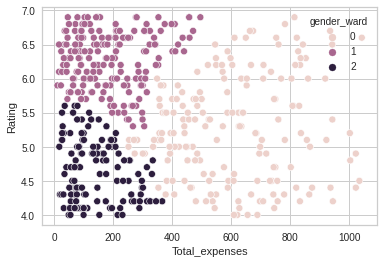

In [174]:
sns.scatterplot(x='Total_expenses', y='Rating', hue='gender_ward', data=df);

In [175]:
df['gender_ward'].value_counts()

1    189
0    183
2    127
Name: gender_ward, dtype: int64

**Ward-Cluster mit schlechteren Bewertungen und niedrigeren Ausgaben (2)**

In [179]:
df_ward_cluster_2 = df[df.gender_ward == 2]
ward_gender_occurencies_cluster_2_female = df_ward_cluster_2['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_2_male = df_ward_cluster_2['Gender'].value_counts()['Male']

ward_gender_sum_cluster_2 = ward_gender_occurencies_cluster_2_female + ward_gender_occurencies_cluster_2_male
female_proportion_ward_cluster_2 = round((ward_gender_occurencies_cluster_2_female /  ward_gender_sum_cluster_2) * 100, 2)
male_proportion_ward_cluster_2 = 100 - female_proportion_ward_cluster_2

print("Cluster 2:\n", "Female: ",ward_gender_occurencies_cluster_2_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_2_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_2, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_2, "%")

Cluster 2:
 Female:  70 
 Male:  57 
 Anteil der Frauen:  55.12 % 
 Anteil der Männer:  44.88 %


**Ward-Cluster mit besseren Bewertungen und niedrigeren Ausgaben (1)**

In [180]:
df_ward_cluster_1 = df[df.gender_ward == 1]
ward_gender_occurencies_cluster_1_female = df_ward_cluster_1['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_1_male = df_ward_cluster_1['Gender'].value_counts()['Male']

ward_gender_sum_cluster_1 = ward_gender_occurencies_cluster_1_female + ward_gender_occurencies_cluster_1_male
female_proportion_ward_cluster_1 = round((ward_gender_occurencies_cluster_1_female /  ward_gender_sum_cluster_1) * 100, 2)
male_proportion_ward_cluster_1 = 100 - female_proportion_ward_cluster_1

print("\n Cluster 1:\n", "Female: ",ward_gender_occurencies_cluster_1_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_1_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_1, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_1, "%")


 Cluster 1:
 Female:  78 
 Male:  111 
 Anteil der Frauen:  41.27 % 
 Anteil der Männer:  58.73 %


**Ward-Cluster mit höheren Ausgaben (0)**

In [181]:
df_ward_cluster_0 = df[df.gender_ward == 0]
ward_gender_occurencies_cluster_0_female = df_ward_cluster_0['Gender'].value_counts()['Female']
ward_gender_occurencies_cluster_0_male = df_ward_cluster_0['Gender'].value_counts()['Male']

ward_gender_sum_cluster_0 = ward_gender_occurencies_cluster_0_female + ward_gender_occurencies_cluster_0_male
female_proportion_ward_cluster_0 = round((ward_gender_occurencies_cluster_0_female /  ward_gender_sum_cluster_0) * 100, 2)
male_proportion_ward_cluster_0 = 100 - female_proportion_ward_cluster_0

print("\n Cluster 0:\n", "Female: ",ward_gender_occurencies_cluster_0_female,"\n",
      "Male: ", ward_gender_occurencies_cluster_0_male, "\n Anteil der Frauen: ",
      female_proportion_ward_cluster_0, "%", "\n Anteil der Männer: ", male_proportion_ward_cluster_0, "%")


 Cluster 0:
 Female:  94 
 Male:  89 
 Anteil der Frauen:  51.37 % 
 Anteil der Männer:  48.63 %


**Geschlechter-Anteile der jeweiligen Cluster des Ward-Algorithmus (gemessen an der Gesamtanzahl der beiden Geschlechter im Datensatz)**

In [203]:
# Cluster 2:
overall_female_proportion_cluster_2 = round((ward_gender_occurencies_cluster_2_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_2 = round((ward_gender_occurencies_cluster_2_male / df['Gender'].value_counts()['Male']) * 100, 2)
# Cluster 1: 
overall_female_proportion_cluster_1 = round((ward_gender_occurencies_cluster_1_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_1 = round((ward_gender_occurencies_cluster_1_male / df['Gender'].value_counts()['Male']) * 100, 2)

# Cluster 0: 
overall_female_proportion_cluster_0 = round((ward_gender_occurencies_cluster_0_female / df['Gender'].value_counts()['Female']) * 100, 2)
overall_male_proportion_cluster_0 = round((ward_gender_occurencies_cluster_0_male / df['Gender'].value_counts()['Male']) * 100, 2)

print("Frauen: \n", "Cluster 2: ",overall_female_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_female_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_female_proportion_cluster_0,"%")
print("Männer: \n", "Cluster 2: ",overall_male_proportion_cluster_2,"%","\n", "Cluster 1: ",overall_male_proportion_cluster_1,"%", "\n", "Cluster 0: ",  overall_male_proportion_cluster_0,"%")

Frauen: 
 Cluster 2:  28.93 % 
 Cluster 1:  32.23 % 
 Cluster 0:  38.84 %
Männer: 
 Cluster 2:  22.18 % 
 Cluster 1:  43.19 % 
 Cluster 0:  34.63 %
